In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'D:\MACHINE LEARNING\Iris.csv')

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
y=df["Species"]
X=df.drop("Species",axis=1)

In [6]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_test_pred=classifier.predict(X_test)

In [9]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.9736842105263158

In [12]:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


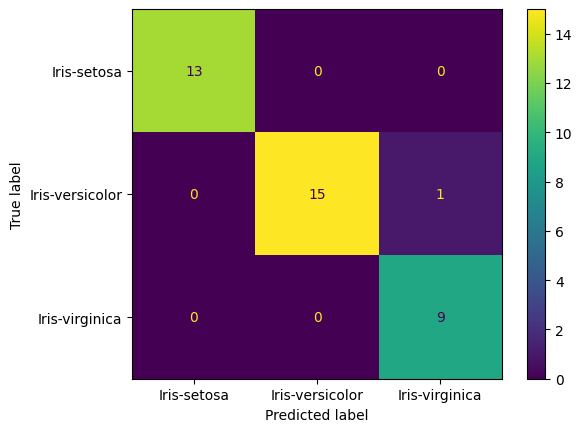

In [13]:
cm=metrics.confusion_matrix(y_test,y_test_pred)
fig=metrics.ConfusionMatrixDisplay(cm,display_labels=classifier.classes_)
fig.plot()

In [14]:
actual=np.sum(cm,axis=1).reshape(-1,1)
cmn=np.round(cm/actual,2)
print("Normalized Confusion Matrix:")
print(cmn)


Confusion Matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


Text(0.5, 23.52222222222222, 'Predicted')

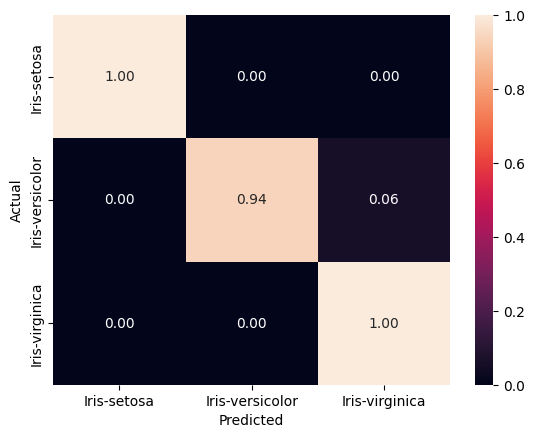

In [15]:
sns.heatmap(cmn,annot=True,fmt='.2f',xticklabels=classifier.classes_,yticklabels=classifier.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [17]:
print(metrics.precision_score(y_test,y_test_pred,average=None))

[1.  1.  0.9]


In [18]:
print(metrics.recall_score(y_test,y_test_pred,average=None))

[1.     0.9375 1.    ]


In [19]:
print(metrics.classification_report(y_test,y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

